In [13]:
import sys
import os
import cv2
import random 
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf

In [15]:
visible_devices = tf.config.experimental.list_physical_devices('GPU')

if visible_devices:
    print("GPU is available.")
    for device in visible_devices:
        print(f"Device name: {device.name}")
else:
    print("No GPU is available. TensorFlow will use CPU.")

GPU is available.
Device name: /physical_device:GPU:0
Device name: /physical_device:GPU:1


In [16]:
augmentation_sequences = [
    # Geometric
    iaa.Fliplr(1.0),                  # Horizontal flip
    iaa.Flipud(1.0),                  # Vertical flip
    iaa.ScaleX(0.85),                 # Scaling in x-axis
    # Noises
    iaa.AdditiveGaussianNoise(scale=(0, 10)),     # Gaussian
    iaa.AdditiveLaplaceNoise(scale=(0, 10)),      # Uniform
    iaa.AdditivePoissonNoise(40),                 # Poisson
    iaa.SaltAndPepper(0.1)                        # Salt and Pepper
]

# Rotation from -180 to 180
def aug_rotation(degree, image):
    rotation = iaa.Affine(rotate=degree)
    img = rotation(image=image)

    return img

In [17]:
# Load the dataset
def load_2Dimages(folder):
    images = []
    # Keep the information of axis z (each slice)
    file_list = sorted(file for file in os.listdir(folder) if file.endswith('.png'))

    for filename in file_list:
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # grayscale
        if img is not None:
            images.append(img)
    return np.array(images)

In [18]:
def process_original(image2D):
    image_3_channels = np.stack((image2D,)*3, axis=-1)
    return image_3_channels

def process_mask(images2D):
    mask_2_channels = np.zeros(images2D.shape + (2,))
    indices_greater_than_0_5 = np.where(images2D > 5)
    for idx in zip(*indices_greater_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],0] = 1

    indices_smaller_than_0_5 = np.where(images2D < 5)
    for idx in zip(*indices_smaller_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],1] = 1

    return mask_2_channels

In [6]:
def data_aug(ori_path, mask_path):
    img_original = load_2Dimages(ori_path)
    p_original = process_original(img_original)
    img_mask = load_2Dimages(mask_path)
    p_mask = process_mask(img_mask)

    fliph_original = np.zeros((64,512,512))
    fliph_mask = np.zeros((64,512,512))
    flipv_original = np.zeros((64,512,512))
    flipv_mask = np.zeros((64,512,512))
    scaleX_original = np.zeros((64,512,512))
    scaleX_mask = np.zeros((64,512,512))
    rotation_original = np.zeros((64,512,512))
    rotation_mask = np.zeros((64,512,512))
    rotation2_original = np.zeros((64,512,512))
    rotation2_mask = np.zeros((64,512,512))
    noise1_original = np.zeros((64,512,512))
    noise1_mask = np.zeros((64,512,512))    
    noise2_original = np.zeros((64,512,512))
    noise2_mask = np.zeros((64,512,512))
    
    for i in range(64):
        fliph_original[i,:,:] = augmentation_sequences[0](image=img_original[i,:,:])
        fliph_mask[i,:,:] = augmentation_sequences[0](image=img_mask[i,:,:])
        flipv_original[i,:,:] = augmentation_sequences[1](image=img_original[i,:,:])
        flipv_mask[i,:,:] = augmentation_sequences[1](image=img_mask[i,:,:])
        scaleX_original[i,:,:] = augmentation_sequences[2](image=img_original[i,:,:])
        scaleX_mask[i,:,:] = augmentation_sequences[2](image=img_mask[i,:,:])

        degree = random.sample(range(-180, 180), 2)
        rotation_original[i,:,:] = aug_rotation(degree[0], img_original[i,:,:])
        rotation_mask[i,:,:] = aug_rotation(degree[0], img_mask[i,:,:])
        rotation2_original[i,:,:] = aug_rotation(degree[1], img_original[i,:,:])
        rotation2_mask[i,:,:] = aug_rotation(degree[1], img_mask[i,:,:])
    
        ind = random.sample(range(3, 7), 2)
        noise1_original[i,:,:] = augmentation_sequences[ind[0]](image=img_original[i,:,:])
        noise1_mask[i,:,:] = augmentation_sequences[ind[0]](image=img_mask[i,:,:])
        noise2_original[i,:,:] = augmentation_sequences[ind[1]](image=img_original[i,:,:])
        noise2_mask[i,:,:] = augmentation_sequences[ind[1]](image=img_mask[i,:,:])
        
    fliph_original = process_original(fliph_original)
    fliph_mask = process_mask(fliph_mask)
    flipv_original = process_original(flipv_original)
    flipv_mask = process_mask(flipv_mask)
    scaleX_original = process_original(scaleX_original)
    scaleX_mask = process_mask(scaleX_mask)
    rotation_original = process_original(rotation_original)
    rotation_mask = process_mask(rotation_mask)
    rotation2_original = process_original(rotation2_original)
    rotation2_mask = process_mask(rotation2_mask)
    noise1_original = process_original(noise1_original)
    noise1_mask = process_mask(noise1_mask)
    noise2_original = process_original(noise2_original)
    noise2_mask = process_mask(noise2_mask)
    
    original = np.concatenate((p_original, fliph_original, flipv_original, scaleX_original, 
                               rotation_original, rotation2_original, noise1_original, noise2_original), axis=0)
    mask = np.concatenate((p_mask, fliph_mask, flipv_mask, scaleX_mask, 
                           rotation_mask, rotation2_mask, noise1_mask, noise2_mask), axis=0)
    return original, mask

In [22]:
def data_aug(ori_path, mask_path):
    img_original = load_2Dimages(ori_path)
    p_original = process_original(img_original)
    img_mask = load_2Dimages(mask_path)
    p_mask = process_mask(img_mask)

    
    
    original = p_original
    mask = p_mask
    return original, mask

In [25]:
img_original = load_2Dimages("/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC1")

In [26]:
img_original = process_original(img_original)

In [28]:
img_original.shape

(64, 512, 512, 3)

In [23]:
path_train_original1 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC1"
path_train_mask1 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC1"
path_train_original2 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC2"
path_train_mask2 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC2"
path_train_original3 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC3"
path_train_mask3 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC3"
path_train_original4 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC4"
path_train_mask4 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC4"
path_train_original5 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC5"
path_train_mask5 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC5"
path_train_original6 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC6"
path_train_mask6 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC6"
path_train_original7 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC7"
path_train_mask7 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC7"
path_train_original8 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC8"
path_train_mask8 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC8"
path_train_original9 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Original/TAC9"
path_train_mask9 = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Mask/TAC9"

In [29]:
train_original1_2D, train_mask1_2D = data_aug(path_train_original1, path_train_mask1)
train_original2_2D, train_mask2_2D = data_aug(path_train_original2, path_train_mask2)
train_original3_2D, train_mask3_2D = data_aug(path_train_original3, path_train_mask3)
train_original4_2D, train_mask4_2D = data_aug(path_train_original4, path_train_mask4)
train_original5_2D, train_mask5_2D = data_aug(path_train_original5, path_train_mask5)
train_original6_2D, train_mask6_2D = data_aug(path_train_original6, path_train_mask6)
train_original7_2D, train_mask7_2D = data_aug(path_train_original7, path_train_mask7)
train_original8_2D, train_mask8_2D = data_aug(path_train_original8, path_train_mask8)
train_original9_2D, train_mask9_2D = data_aug(path_train_original9, path_train_mask9)

In [10]:
# Cross-validation sets
train_original_2D = np.concatenate((train_original1_2D, train_original2_2D, train_original3_2D, train_original4_2D,
                             train_original5_2D, train_original6_2D, train_original7_2D), axis=0)
train_mask_2D = np.concatenate((train_mask1_2D, train_mask2_2D, train_mask3_2D, train_mask4_2D, 
                                train_mask5_2D, train_mask6_2D, train_mask7_2D), axis=0)

: 

In [245]:
# Save the data of 3D images
np.save('/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Data_Augmentation/2D_train_aug_original2.npy', train_original_2D)
np.save('/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Data_Augmentation/2D_train_aug_mask2.npy', train_mask_2D)

In [15]:
train_mask8_2D.shape

(512, 512, 512, 2)

In [16]:
train_original8_2D.shape

(512, 512, 512, 3)

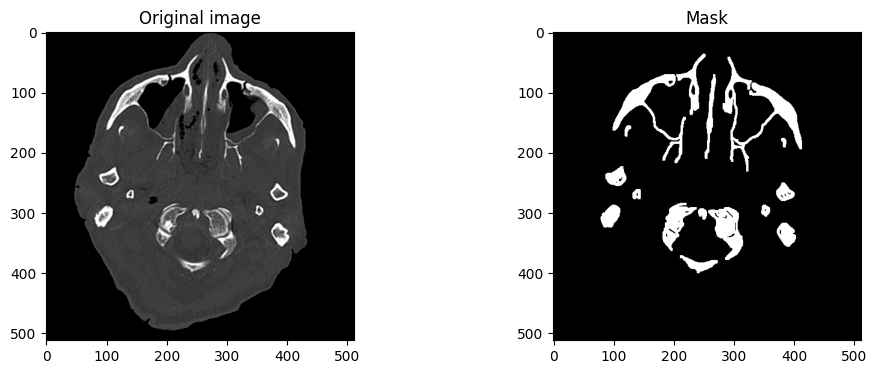

In [17]:
# Check the images 2D
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(train_original9_2D[21,:,:,0], cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(train_mask9_2D[21,:,:,0], cmap='gray')
axes[1].set_title('Mask')
    
plt.show()

In [ ]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

In [24]:
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
validation_original_2D = train_original8_2D
validation_mask_2D = train_mask8_2D
test_original_2D = np.load('/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Data_Augmentation/2D_test_original1.npy')
test_mask_2D = np.load('/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/Data_Augmentation/2D_test_mask1.npy')

In [26]:
print("Shape of the data:", test_original_2D.shape)
print("Shape of the data:", train_mask_2D.shape)

Shape of the data: (64, 512, 512, 3)
Shape of the data: (3584, 512, 512, 2)


In [27]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

def vanilla_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255)(inputs)   
    #s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()
    
    return model

In [28]:
LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

2024-03-06 11:44:50.474323: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 11:44:50.474509: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 11:44:50.474718: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required l

In [33]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [34]:
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [35]:
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [36]:
model = vanilla_unet_model(IMG_HEIGHT=512,
                          IMG_WIDTH=512,
                          IMG_CHANNELS=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 512, 512, 1)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 16)         160       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 16)         0         ['conv2d[0][0]']              
                                                                                              

In [37]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
#print(model.summary())

In [47]:
visible_devices = tf.config.experimental.list_physical_devices('GPU')

if visible_devices:
    print("GPU is available.")
    for device in visible_devices:
        print(f"Device name: {device.name}")
else:
    print("No GPU is available. TensorFlow will use CPU.")

No GPU is available. TensorFlow will use CPU.


In [48]:
print(tf.config.list_physical_devices('GPU'))

[]


In [42]:
print(tf.__version__)

2.15.0


In [ ]:
history = model.fit(train_original_2D[:,:,:,0],
          train_mask_2D[:,:,:,0],
          batch_size = 4,
          epochs = 40,
          verbose = 1,
          validation_data=(validation_original_2D[:,:,:,0], validation_mask_2D[:,:,:,0]))

In [ ]:
# Plot loss function
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Loss (Vanilla Unet-2D, cv1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper right')